**Practical Application 1**


Will the Customer Accept the Coupon?

In [136]:
#Loading and exploring the data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [137]:
df = pd.read_csv('data/coupons.csv')

In [138]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**Deliverables**

Investigating the dataset for missing or problematic data. Visualizing the data as well.


In [139]:
# Check for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


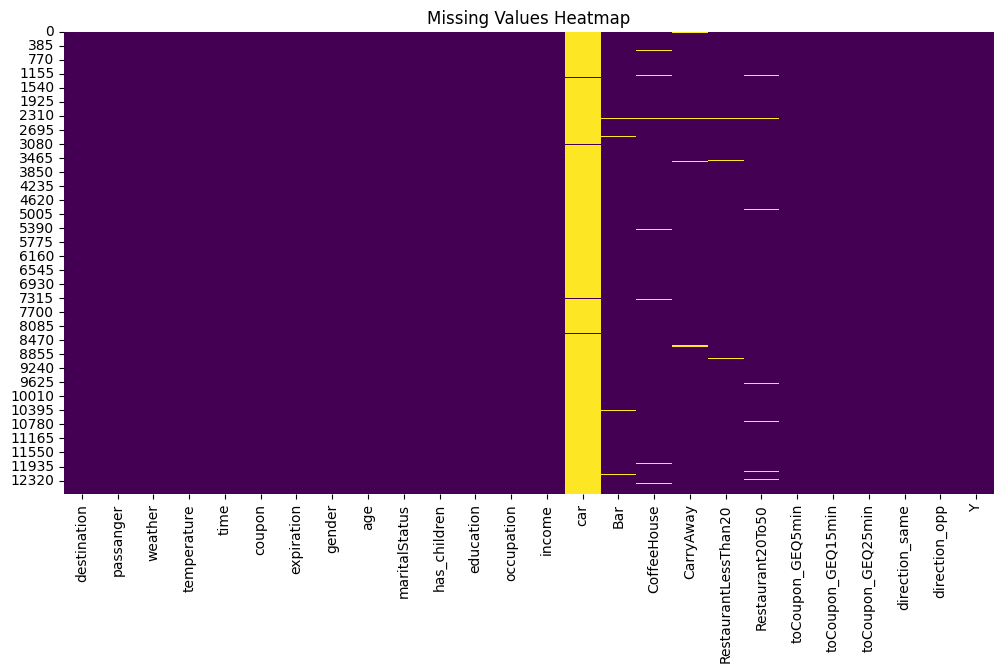

In [140]:
# Visualize missing values

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [92]:
# Summary statistics

print(df.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

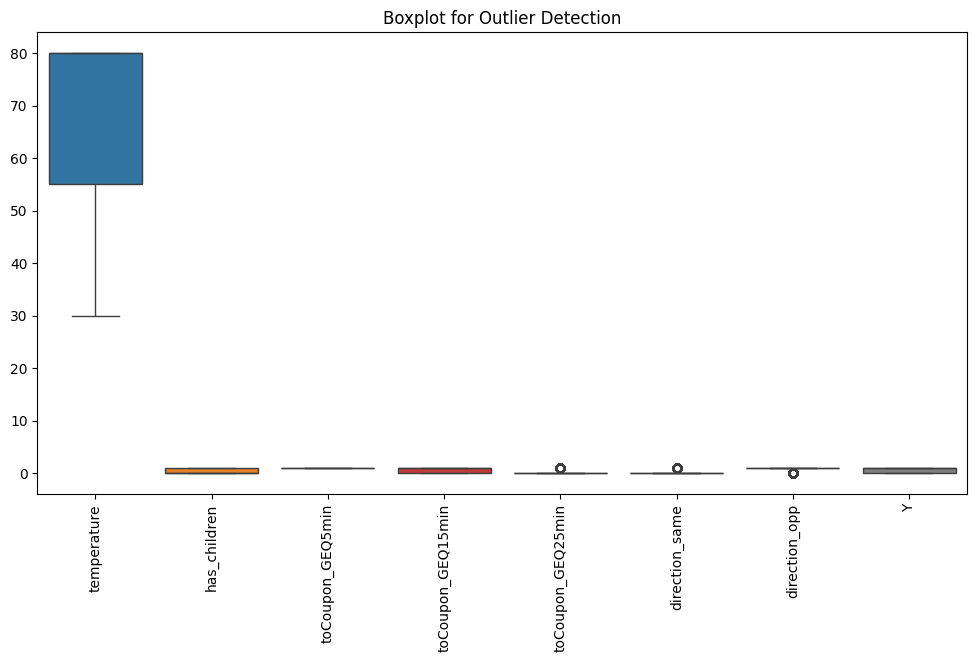

In [93]:
# Check for problematic data (e.g., outliers)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

In [94]:
# Check for unique values in categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", df[col].unique())

Unique values in destination:
 ['No Urgent Place' 'Home' 'Work']
Unique values in passanger:
 ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in weather:
 ['Sunny' 'Rainy' 'Snowy']
Unique values in time:
 ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in coupon:
 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in expiration:
 ['1d' '2h']
Unique values in gender:
 ['Female' 'Male']
Unique values in age:
 ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in maritalStatus:
 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in education:
 ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in occupation:
 ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Mana

In [95]:
# Check for data types

print("Data types of each column:\n", df.dtypes)

Data types of each column:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [101]:
#Decide what to do about your missing data -- drop, replace, other...

#There are several approaches to handle missing data
#1. Drop missing values
#2. Replace missing values with a specific value - such as mean, median, or mode of the column
#3. Flag the missing values in a new column and then replace so that the information about the missing data is retained. 

# Specify the columns you want to handle missing data for
columns_to_handle = ['column1', 'column2', 'column3']

# Convert columns to appropriate data types
for column in columns_to_handle:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Option 1: Drop rows with missing data in specific columns
df_dropped = df.dropna(subset=columns_to_handle)
print("\nData after dropping missing values in specific columns:")
print(df_dropped.head())

# Option 2: Replace missing data with mean/median/mode in specific columns
# Replace with mean
df_mean = df.copy()
df_mean[columns_to_handle] = df_mean[columns_to_handle].fillna(df_mean[columns_to_handle].mean())
print("\nData after replacing missing values with mean in specific columns:")
print(df_mean.head())

# Replace with median
df_median = df.copy()
df_median[columns_to_handle] = df_median[columns_to_handle].fillna(df_median[columns_to_handle].median())
print("\nData after replacing missing values with median in specific columns:")
print(df_median.head())



I am choosing to keep the dataset as is and not replace anything to avoid misrepresentation of data - replacing missing values can sometimes misrepresent the true nature of the data. For instance, if you replace missing values in a categorical variable with the mode, you might end up with an overrepresentation of the most common category. This could also introduce bias. 


In [141]:
# Calculate the proportion of accepted coupons

total_observations = len(df)
accepted_coupons = df['Y'].sum()
proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of total observations that accepted the coupon: {proportion_accepted:.2%}")


Proportion of total observations that accepted the coupon: 56.84%


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\2913392856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coupon', palette='viridis')


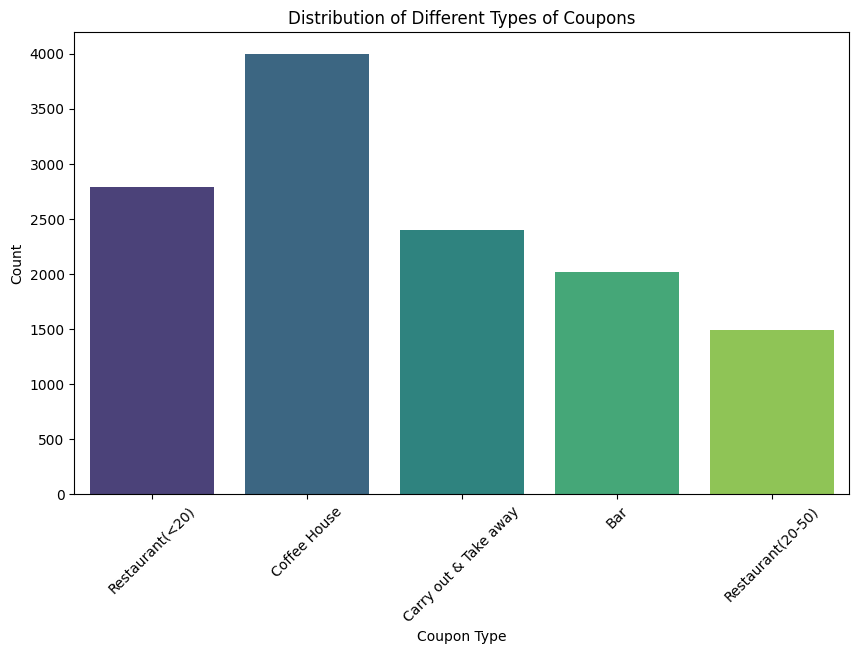

In [142]:
# Create a bar plot for the coupon column

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon', palette='viridis')
plt.title('Distribution of Different Types of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

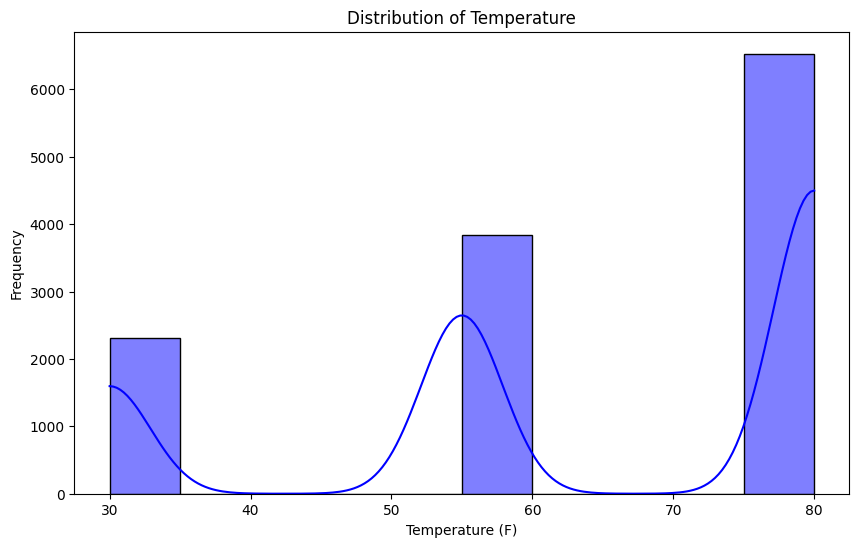

In [106]:
# Create a histogram for the temperature column

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='temperature', bins=10, kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

In [143]:
# Filter the DataFrame to include only rows where the coupon is for a bar
bar_coupons_df = df[df['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
print(bar_coupons_df.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

In [144]:
print("Data types of each column:\n", bar_coupons_df.dtypes)

Data types of each column:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [145]:
# Calculate the proportion of accepted bar coupons
proportion_accepted = bar_coupons_df['Y'].mean()

# Print the result
print(f"Proportion of bar coupons that were accepted: {proportion_accepted:.2%}")

Proportion of bar coupons that were accepted: 41.00%


In [146]:
categorical_columns = bar_coupons_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", bar_coupons_df[col].unique())

Unique values in destination:
 ['No Urgent Place' 'Home' 'Work']
Unique values in passanger:
 ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Unique values in weather:
 ['Sunny' 'Rainy' 'Snowy']
Unique values in time:
 ['10AM' '6PM' '7AM' '10PM' '2PM']
Unique values in coupon:
 ['Bar']
Unique values in expiration:
 ['1d' '2h']
Unique values in gender:
 ['Female' 'Male']
Unique values in age:
 ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in maritalStatus:
 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in education:
 ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in occupation:
 ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'


In [157]:
unique_values = df['Bar'].unique()
print("Unique values in the 'Bar' column:")
print(unique_values)


Unique values in the 'Bar' column:
['never' 'less1' '1~3' 'gt8' nan '4~8']


In [149]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

# Filter the data to include only bar coupons
bar_coupons_df = df[df['coupon'] == 'Bar'].copy()

# Convert the 'Bar' column to numeric values for comparison
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})

# Ensure 'Y' column is numeric
bar_coupons_df['Y'] = pd.to_numeric(bar_coupons_df['Y'], errors='coerce')

# Filter the data based on the frequency of bar visits
bar_3_or_fewer = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate acceptance rates
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

# Print the results
print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2%}")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

Acceptance rate for those who go to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who go to a bar more than 3 times a month: 76.88%


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\3841698690.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({


In [158]:
unique_values = df['Bar'].unique()
print("Unique values in the 'Bar' column:")
print(unique_values)


Unique values in the 'Bar' column:
['never' 'less1' '1~3' 'gt8' nan '4~8']


In [159]:
# Map age values to numerical ones
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
bar_coupons_df['age'] = bar_coupons_df['age'].map(age_mapping)

# Convert columns to appropriate data types
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
bar_coupons_df['Y'] = pd.to_numeric(bar_coupons_df['Y'], errors='coerce')

# Drop rows with missing values in the relevant columns
bar_coupons_df = bar_coupons_df.dropna(subset=['age', 'Bar', 'Y'])

# Filter the data for drivers who go to a bar more than once a month and are over the age of 25
bar_more_than_once_over_25 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25)]

# Filter the data for all other drivers
all_others = bar_coupons_df[~((bar_coupons_df['Bar'] > 1) & (bar_coupons_df['age'] > 25))]

# Calculate the acceptance rate for both groups
acceptance_rate_bar_more_than_once_over_25 = bar_more_than_once_over_25['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_bar_more_than_once_over_25:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others:.2%}")

# Check if there is a difference
difference = acceptance_rate_bar_more_than_once_over_25 - acceptance_rate_all_others
print(f"Difference in acceptance rates: {difference:.2%}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52%
Acceptance rate for all other drivers: 33.44%
Difference in acceptance rates: 36.08%


In [66]:
# Define the groups based on bar visits, passengers, and occupation
group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'kid') & 
    (~bar_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry']))
]

group_2 = bar_coupons_df[
    ~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'kid') & 
    (~bar_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry'])))
]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_group_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2:.2%}")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 68.79%
Acceptance rate for all other drivers: 29.35%


In [ ]:
Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [80]:
# Load the dataset
df1 = pd.read_csv('data/coupons.csv')

# Convert age to numerical values if necessary
df1['age'] = df1['age'].astype(str).str.extract('(\d+)').astype(float)

# Convert income to numerical values
income_mapping = {
    'less than $12500': 12500,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or more': 100000
}
df1['income'] = df1['income'].map(income_mapping)

# Define the groups based on the given conditions
group_1 = df1[
    (df1['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (df1['passanger'] != 'kid') & 
    (df1['maritalStatus'] != 'widowed')
]

group_2 = df1[
    (df1['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (df1['age'] < 30)
]

group_3 = df1[
    (df1['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df1['income'] < 50000)
]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_group_1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_group_2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_group_3:.2%}")



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.21%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 62.81%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 59.40%


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\4129078119.py:5: SyntaxWarning: invalid escape sequence '\d'
  df1['age'] = df1['age'].astype(str).str.extract('(\d+)').astype(float)


In [163]:
# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Filter the data to include only Coffee House coupons
coffee_coupons_df = data[data['coupon'] == 'Coffee House'].copy()

# Map age values to numerical ones
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
coffee_coupons_df['age'] = coffee_coupons_df['age'].map(age_mapping)

# Convert columns to appropriate data types
coffee_coupons_df['CoffeeHouse'] = coffee_coupons_df['CoffeeHouse'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
coffee_coupons_df['Y'] = pd.to_numeric(coffee_coupons_df['Y'], errors='coerce')

# Drop rows with missing values in the relevant columns
coffee_coupons_df = coffee_coupons_df.dropna(subset=['age', 'CoffeeHouse', 'Y'])

# Calculate the proportion of accepted Coffee House coupons
proportion_accepted = coffee_coupons_df['Y'].mean()
print(f"Proportion of Coffee House coupons that were accepted: {proportion_accepted:.2%}")

# Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more
coffee_3_or_fewer = coffee_coupons_df[coffee_coupons_df['CoffeeHouse'] <= 3]
coffee_more_than_3 = coffee_coupons_df[coffee_coupons_df['CoffeeHouse'] > 3]

acceptance_rate_3_or_fewer = coffee_3_or_fewer['Y'].mean()
acceptance_rate_more_than_3 = coffee_more_than_3['Y'].mean()

print(f"Acceptance rate for those who go to a Coffee House 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2%}")
print(f"Acceptance rate for those who go to a Coffee House more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

# Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to all others
coffee_more_than_once_over_25 = coffee_coupons_df[(coffee_coupons_df['CoffeeHouse'] > 1) & (coffee_coupons_df['age'] > 25)]
all_others = coffee_coupons_df[~((coffee_coupons_df['CoffeeHouse'] > 1) & (coffee_coupons_df['age'] > 25))]

acceptance_rate_coffee_more_than_once_over_25 = coffee_more_than_once_over_25['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers who go to a Coffee House more than once a month and are over the age of 25: {acceptance_rate_coffee_more_than_once_over_25:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others:.2%}")

difference = acceptance_rate_coffee_more_than_once_over_25 - acceptance_rate_all_others
print(f"Difference in acceptance rates: {difference:.2%}")

# Compare the acceptance rate between drivers who go to Coffee Houses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
group_1 = coffee_coupons_df[
    (coffee_coupons_df['CoffeeHouse'].isin([2, 6, 9])) & 
    (coffee_coupons_df['passanger'] != 'kid') & 
    (~coffee_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry']))
]

group_2 = coffee_coupons_df[
    ~((coffee_coupons_df['CoffeeHouse'].isin([2, 6, 9])) & 
    (coffee_coupons_df['passanger'] != 'kid') & 
    (~coffee_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry'])))
]

acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

print(f"Acceptance rate for drivers who go to Coffee Houses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_group_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_group_2:.2%}")




Proportion of Coffee House coupons that were accepted: 50.00%
Acceptance rate for those who go to a Coffee House 3 or fewer times a month: 44.94%
Acceptance rate for those who go to a Coffee House more than 3 times a month: 67.50%
Acceptance rate for drivers who go to a Coffee House more than once a month and are over the age of 25: 63.84%
Acceptance rate for all other drivers: 42.67%
Difference in acceptance rates: 21.17%
Acceptance rate for drivers who go to Coffee Houses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 66.02%
Acceptance rate for all other drivers: 34.62%


C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\996582509.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coffee_coupons_df['CoffeeHouse'] = coffee_coupons_df['CoffeeHouse'].replace({


**Analysis and visualization for Restaurant coupons**

C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\2752485675.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coffee_coupons_df['CoffeeHouse'] = coffee_coupons_df['CoffeeHouse'].replace({


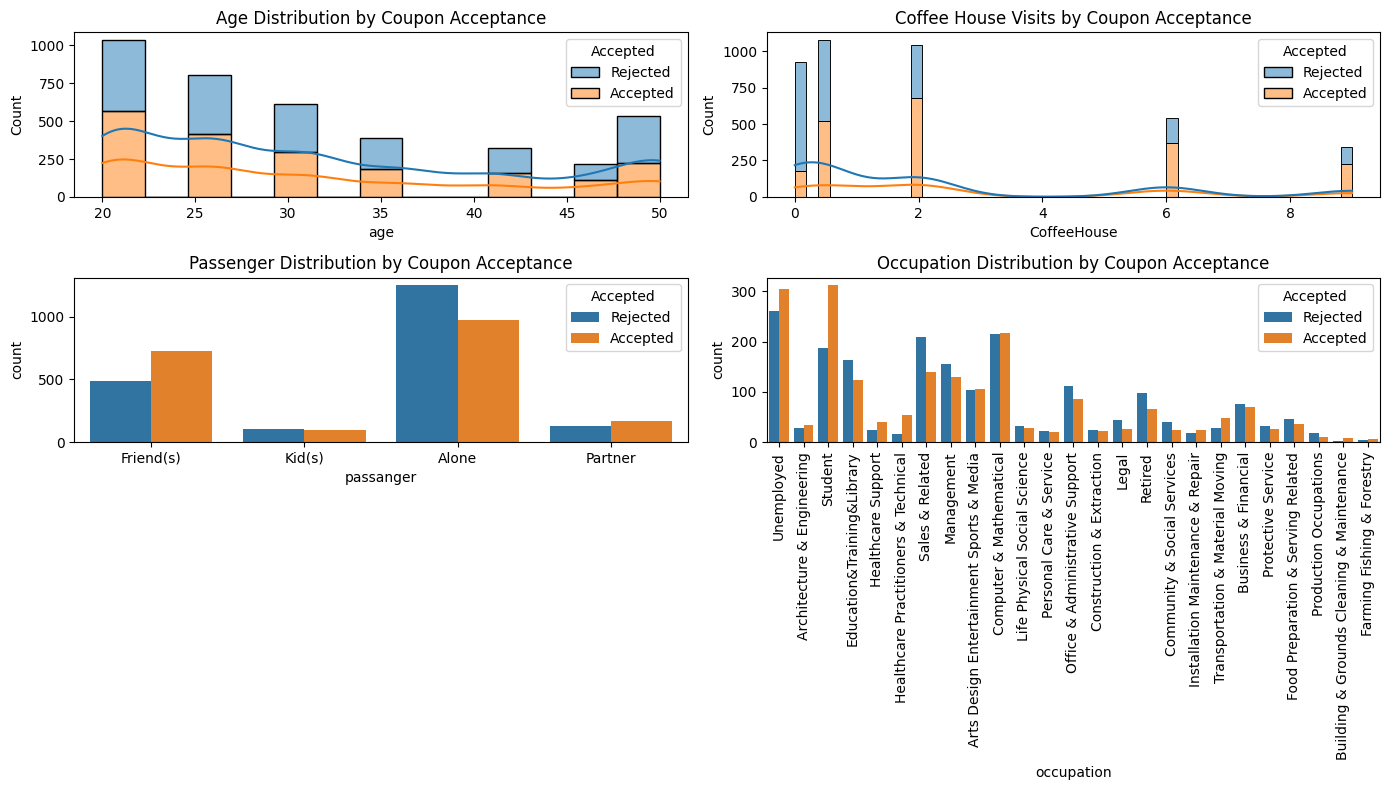

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Filter the data to include only Coffee House coupons
coffee_coupons_df = data[data['coupon'] == 'Coffee House'].copy()

# Map age values to numerical ones
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
coffee_coupons_df['age'] = coffee_coupons_df['age'].map(age_mapping)

# Convert columns to appropriate data types
coffee_coupons_df['CoffeeHouse'] = coffee_coupons_df['CoffeeHouse'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
coffee_coupons_df['Y'] = pd.to_numeric(coffee_coupons_df['Y'], errors='coerce')

# Drop rows with missing values in the relevant columns
coffee_coupons_df = coffee_coupons_df.dropna(subset=['age', 'CoffeeHouse', 'Y'])

# Create a new column for coupon acceptance status
coffee_coupons_df['Accepted'] = coffee_coupons_df['Y'].map({1: 'Accepted', 0: 'Rejected'})

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the distribution of age for accepted and rejected coupons
plt.subplot(2, 2, 1)
sns.histplot(data=coffee_coupons_df, x='age', hue='Accepted', multiple='stack', kde=True)
plt.title('Age Distribution by Coupon Acceptance')

# Plot the distribution of CoffeeHouse visits for accepted and rejected coupons
plt.subplot(2, 2, 2)
sns.histplot(data=coffee_coupons_df, x='CoffeeHouse', hue='Accepted', multiple='stack', kde=True)
plt.title('Coffee House Visits by Coupon Acceptance')

# Plot the distribution of passengers for accepted and rejected coupons
plt.subplot(2, 2, 3)
sns.countplot(data=coffee_coupons_df, x='passanger', hue='Accepted')
plt.title('Passenger Distribution by Coupon Acceptance')

# Plot the distribution of occupations for accepted and rejected coupons
plt.subplot(2, 2, 4)
sns.countplot(data=coffee_coupons_df, x='occupation', hue='Accepted')
plt.title('Occupation Distribution by Coupon Acceptance')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Analysis and visualization for Bar coupons**

C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\1687667616.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({


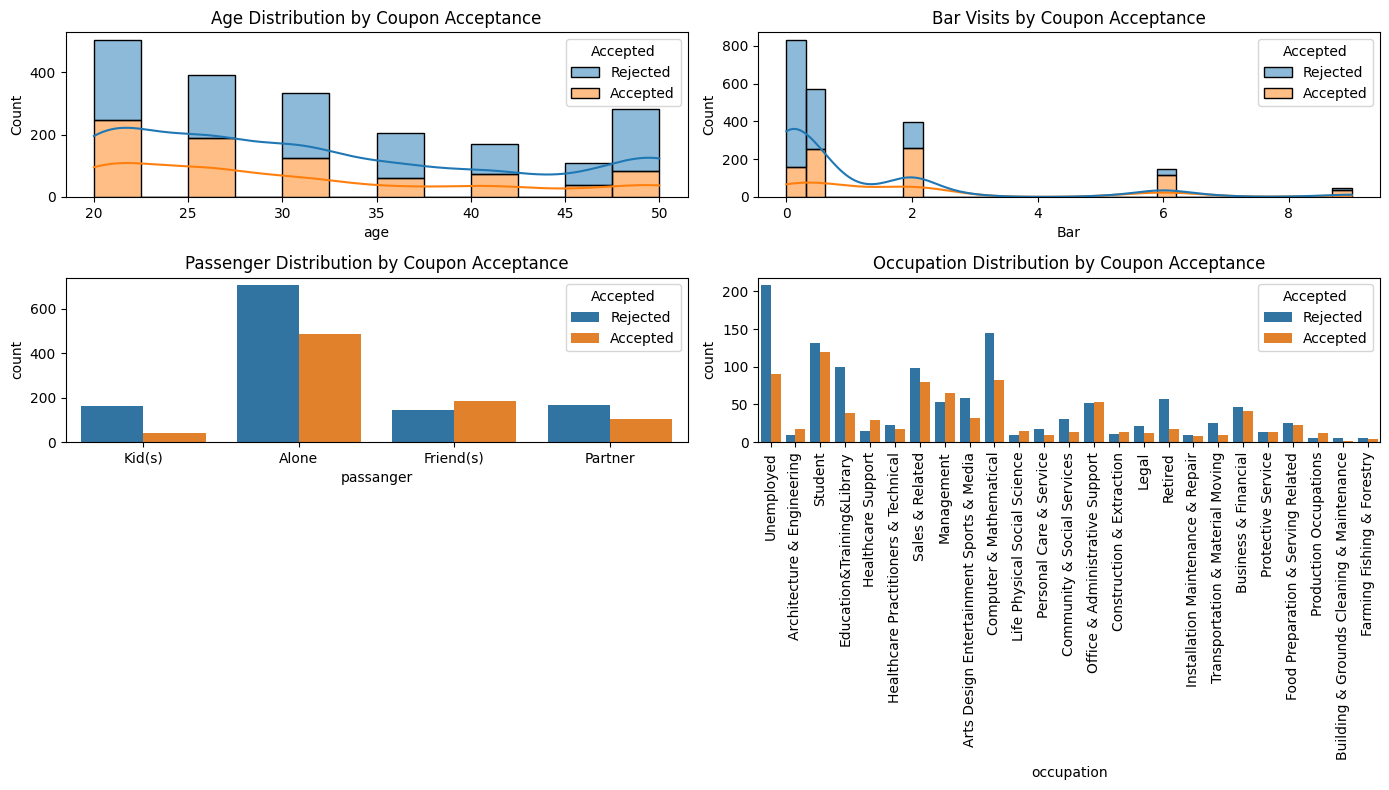

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Filter the data to include only Bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

# Map age values to numerical ones
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
bar_coupons_df['age'] = bar_coupons_df['age'].map(age_mapping)

# Convert columns to appropriate data types
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
bar_coupons_df['Y'] = pd.to_numeric(bar_coupons_df['Y'], errors='coerce')

# Drop rows with missing values in the relevant columns
bar_coupons_df = bar_coupons_df.dropna(subset=['age', 'Bar', 'Y'])

# Create a new column for coupon acceptance status
bar_coupons_df['Accepted'] = bar_coupons_df['Y'].map({1: 'Accepted', 0: 'Rejected'})

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the distribution of age for accepted and rejected coupons
plt.subplot(2, 2, 1)
sns.histplot(data=bar_coupons_df, x='age', hue='Accepted', multiple='stack', kde=True)
plt.title('Age Distribution by Coupon Acceptance')

# Plot the distribution of Bar visits for accepted and rejected coupons
plt.subplot(2, 2, 2)
sns.histplot(data=bar_coupons_df, x='Bar', hue='Accepted', multiple='stack', kde=True)
plt.title('Bar Visits by Coupon Acceptance')

# Plot the distribution of passengers for accepted and rejected coupons
plt.subplot(2, 2, 3)
sns.countplot(data=bar_coupons_df, x='passanger', hue='Accepted')
plt.title('Passenger Distribution by Coupon Acceptance')

# Plot the distribution of occupations for accepted and rejected coupons
plt.subplot(2, 2, 4)
sns.countplot(data=bar_coupons_df, x='occupation', hue='Accepted')
plt.title('Occupation Distribution by Coupon Acceptance')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Analysis and visualization for Restaurant coupons**

C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\3871620965.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  restaurant_coupons_df['RestaurantLessThan20'] = restaurant_coupons_df['RestaurantLessThan20'].replace({
C:\Users\WH157PP\AppData\Local\Temp\ipykernel_28436\3871620965.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  restaurant_coupons_df['Restaurant20To50'] = restaurant_coupons_df['Restaurant20To50'].replace({


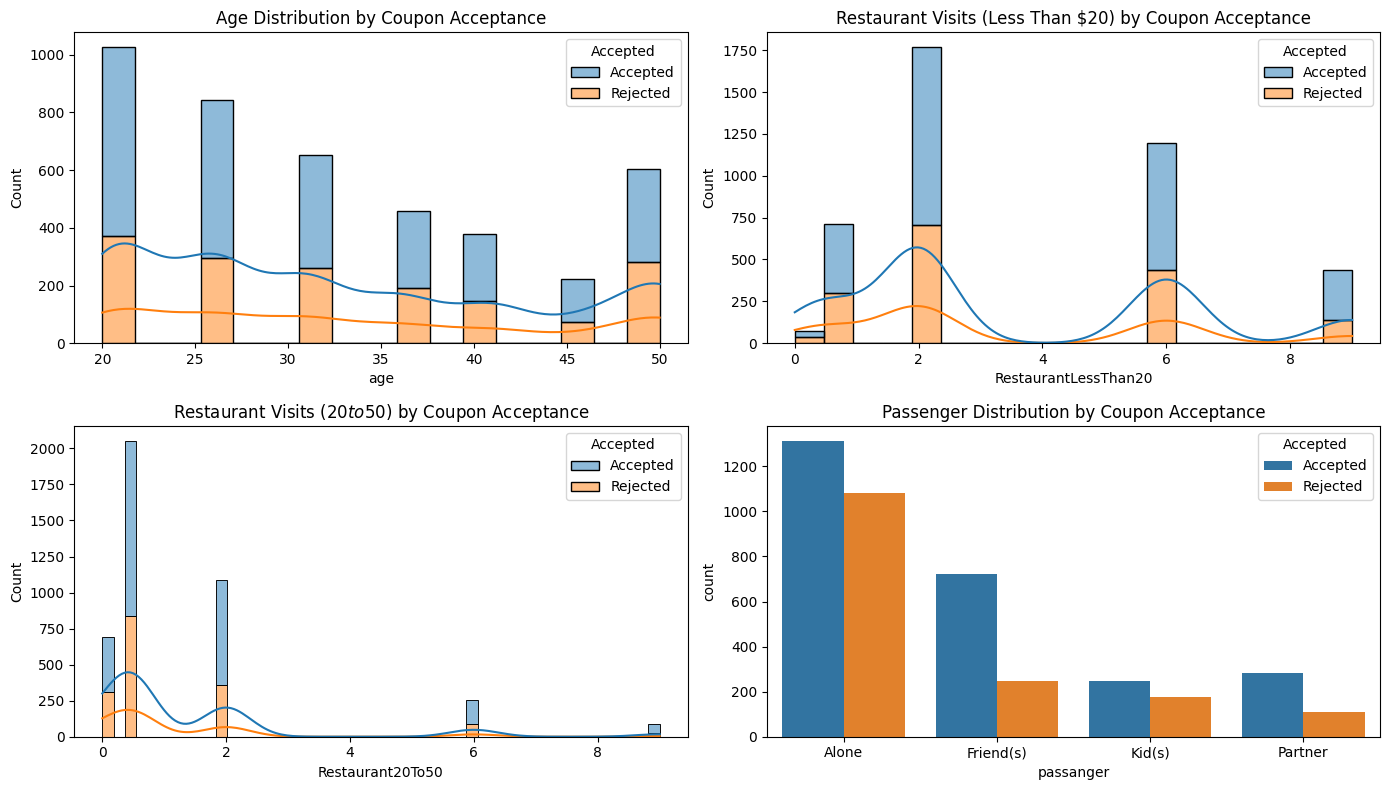

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/coupons.csv')

# Filter the data to include only Restaurant coupons
restaurant_coupons_df = data[data['coupon'].str.contains('Restaurant')].copy()

# Map age values to numerical ones
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
restaurant_coupons_df['age'] = restaurant_coupons_df['age'].map(age_mapping)

# Convert columns to appropriate data types
restaurant_coupons_df['RestaurantLessThan20'] = restaurant_coupons_df['RestaurantLessThan20'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
restaurant_coupons_df['Restaurant20To50'] = restaurant_coupons_df['Restaurant20To50'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
restaurant_coupons_df['Y'] = pd.to_numeric(restaurant_coupons_df['Y'], errors='coerce')

# Drop rows with missing values in the relevant columns
restaurant_coupons_df = restaurant_coupons_df.dropna(subset=['age', 'RestaurantLessThan20', 'Restaurant20To50', 'Y'])

# Create a new column for coupon acceptance status
restaurant_coupons_df['Accepted'] = restaurant_coupons_df['Y'].map({1: 'Accepted', 0: 'Rejected'})

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the distribution of age for accepted and rejected coupons
plt.subplot(2, 2, 1)
sns.histplot(data=restaurant_coupons_df, x='age', hue='Accepted', multiple='stack', kde=True)
plt.title('Age Distribution by Coupon Acceptance')

# Plot the distribution of Restaurant visits (less than $20) for accepted and rejected coupons
plt.subplot(2, 2, 2)
sns.histplot(data=restaurant_coupons_df, x='RestaurantLessThan20', hue='Accepted', multiple='stack', kde=True)
plt.title('Restaurant Visits (Less Than $20) by Coupon Acceptance')

# Plot the distribution of Restaurant visits ($20 to $50) for accepted and rejected coupons
plt.subplot(2, 2, 3)
sns.histplot(data=restaurant_coupons_df, x='Restaurant20To50', hue='Accepted', multiple='stack', kde=True)
plt.title('Restaurant Visits ($20 to $50) by Coupon Acceptance')

# Plot the distribution of passengers for accepted and rejected coupons
plt.subplot(2, 2, 4)
sns.countplot(data=restaurant_coupons_df, x='passanger', hue='Accepted')
plt.title('Passenger Distribution by Coupon Acceptance')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()